In [2]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Mean poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [3]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state

In [4]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [5]:
pr.poverty_rate.value_counts()

0       1464
-        201
6.7      129
7.4      129
10.9     128
        ... 
77.4       1
55.9       1
78         1
56.5       1
68         1
Name: poverty_rate, Length: 771, dtype: int64

**INSTRUCTION-1: replace the "-" with zero.**

In [6]:
pr.poverty_rate.replace(['-'],0.0,inplace = True)

In [7]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


**INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).**

In [8]:
pr.poverty_rate=pr.poverty_rate.astype("float")

In [9]:
pr.poverty_rate

0        78.8
1        29.1
2        25.5
3        30.7
4        42.0
         ... 
29324    18.6
29325    15.3
29326     5.9
29327     5.4
29328     0.0
Name: poverty_rate, Length: 29329, dtype: float64

**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

In [10]:
pd.set_option('display.max_columns' ,None)

In [11]:
s=pr.groupby([pr["Geographic Area"]=="AK",pr["Geographic Area"]=="AL",pr["Geographic Area"]=="AR"])["poverty_rate"].mean()
s

Geographic Area  Geographic Area  Geographic Area
False            False            False              16.082577
                                  True               22.963216
                 True             False              20.611795
True             False            False              18.678592
Name: poverty_rate, dtype: float64

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

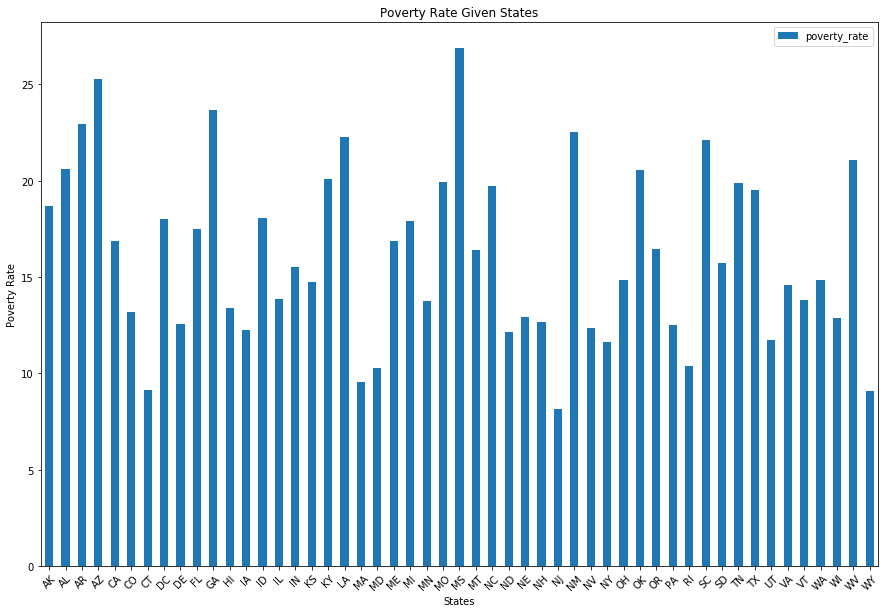

In [12]:
k =pr.groupby("Geographic Area")["poverty_rate"].mean()
k.plot(kind="bar",figsize=(15,10),title="Poverty Rate Given States",x= "States",y = "poverty rate",legend=True,rot=45)
plt.xlabel("States")
plt.ylabel("Poverty Rate");

**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

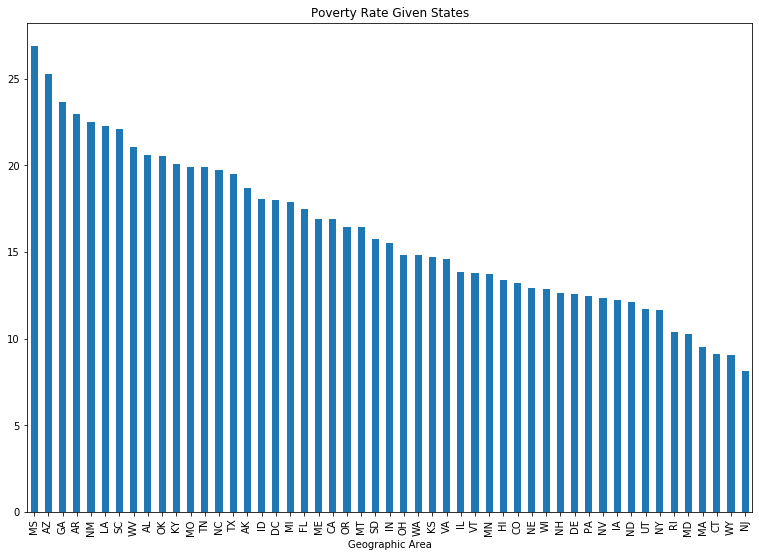

In [13]:
k.sort_values(ascending=False).plot(kind="bar",figsize=(13,9),title="Poverty Rate Given States",x= "States",y = "poverty rate");

**INSTRUCTION-3.b : Plot Sorted Values With Matplotlib:** 

In [14]:
val = pr.groupby("Geographic Area")["poverty_rate"].mean().sort_values(ascending=False)
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(x=val.index,height=val.values)
ax.set_xlabel("States")
ax.set_ylabel("Poverty Rate")
ax.set_title("Poverty Rate Given States")
plt.xticks(val.index,rotation=45);

Error in callback <function flush_figures at 0x000001E2451E9B88> (for post_execute):


KeyboardInterrupt: 

**INSTRUCTION-3.c : Plot Sorted Values With Seaborn** 

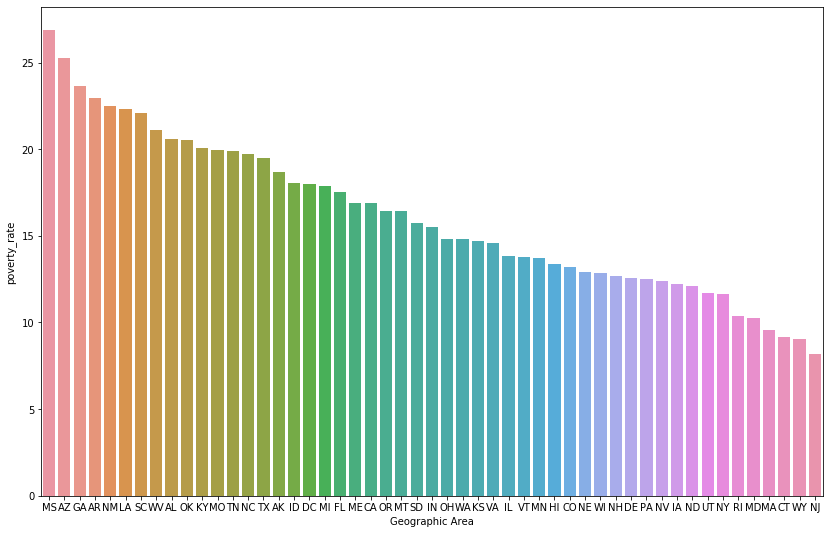

In [15]:
plt.figure(figsize=(14,9))
x= pr.groupby("Geographic Area")["poverty_rate"].mean().sort_values(ascending=False)
sns.barplot(x.index, x)  ;


## 2. Most common 15 Name or Surname of killed people 

In [16]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [17]:
kill.name.value_counts()

TK TK                       49
Daquan Antonio Westbrook     2
Eric Harris                  2
Brandon Jones                2
Michael Johnson              2
                            ..
Jason Fanning                1
William Stokes               1
Stanley Watson               1
Cameron Johnson              1
Scott Bennett                1
Name: name, Length: 2481, dtype: int64

In [18]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

**INSTRUCTION : Plot Most common 15 Name or Surname of killed people** 

In [19]:
a = pairs.tolist()
a

[['Tim', 'Elliot'],
 ['Lewis', 'Lee', 'Lembke'],
 ['John', 'Paul', 'Quintero'],
 ['Matthew', 'Hoffman'],
 ['Michael', 'Rodriguez'],
 ['Kenneth', 'Joe', 'Brown'],
 ['Kenneth', 'Arnold', 'Buck'],
 ['Brock', 'Nichols'],
 ['Autumn', 'Steele'],
 ['Leslie', 'Sapp', 'III'],
 ['Patrick', 'Wetter'],
 ['Ron', 'Sneed'],
 ['Hashim', 'Hanif', 'Ibn', 'Abdul-Rasheed'],
 ['Nicholas', 'Ryan', 'Brickman'],
 ['Omarr', 'Julian', 'Maximillian', 'Jackson'],
 ['Loren', 'Simpson'],
 ['James', 'Dudley', 'Barker'],
 ['Artago', 'Damon', 'Howard'],
 ['Thomas', 'Hamby'],
 ['Jimmy', 'Foreman'],
 ['Andy', 'Martinez'],
 ['Tommy', 'Smith'],
 ['Brian', 'Barbosa'],
 ['Salvador', 'Figueroa'],
 ['John', 'Edward', "O'Keefe"],
 ['Richard', 'McClendon'],
 ['Marcus', 'Golden'],
 ['Michael', 'Goebel'],
 ['Mario', 'Jordan'],
 ['Talbot', 'Schroeder'],
 ['Robert', 'Edwards'],
 ['Jeffrey', 'R.', 'Nielson'],
 ['Donte', 'Sowell'],
 ['Kavonda', 'Earl', 'Payton'],
 ['Quincy', 'Reed', 'Reindl'],
 ['Jose', 'Ceja'],
 ['Nathan', 'Massey']

In [20]:
count = [j for i in a for j in i]
most = Counter(count).most_common(15)
most

[('Michael', 91),
 ('James', 57),
 ('David', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Smith', 36),
 ('Richard', 36),
 ('Anthony', 32),
 ('Johnson', 32),
 ('J.', 32)]

In [21]:
a = pairs.str.join(" ").tolist()
surname=[i.split()[-1] for i in a]

In [22]:
ad = [i.split()[:-1] for i in a]
name = pd.Series(ad)
counter = Counter(name.str.join(" "))
m_c_name=counter.most_common()
#name.str.join(" ").value_counts()
m_c_name

[('Michael', 47),
 ('Joseph', 24),
 ('David', 23),
 ('Joshua', 23),
 ('Robert', 22),
 ('William', 22),
 ('Christopher', 22),
 ('Daniel', 20),
 ('Richard', 19),
 ('John', 18),
 ('James', 18),
 ('Matthew', 15),
 ('Anthony', 15),
 ('Jason', 13),
 ('Charles', 13),
 ('Jose', 12),
 ('Brandon', 12),
 ('Mark', 12),
 ('Andrew', 11),
 ('Nicholas', 11),
 ('Raymond', 10),
 ('Kenneth', 10),
 ('Timothy', 10),
 ('Jeremy', 9),
 ('Brian', 8),
 ('Scott', 8),
 ('Paul', 8),
 ('Phillip', 8),
 ('Kevin', 8),
 ('Steven', 8),
 ('Thomas', 7),
 ('Derek', 7),
 ('Justin', 7),
 ('Eric', 7),
 ('Jeffrey', 7),
 ('Dennis', 7),
 ('Mario', 6),
 ('Jonathan', 6),
 ('Jacob', 6),
 ('Bruce', 6),
 ('Douglas', 6),
 ('Stephen', 6),
 ('Kyle', 6),
 ('Ronald', 6),
 ('Francisco', 6),
 ('Travis', 6),
 ('Patrick', 5),
 ('Antonio', 5),
 ('Rodney', 5),
 ('Adam', 5),
 ('Aaron', 5),
 ('Fred', 5),
 ('Shawn', 5),
 ('Donald', 5),
 ('Luis', 5),
 ('Hector', 5),
 ('Miguel', 5),
 ('Ryan', 5),
 ('Samuel', 5),
 ('Earl', 5),
 ('Carlos', 5),
 ('Jorg

In [23]:
x,y = zip(*sorted(most,key=lambda x :x[1]))

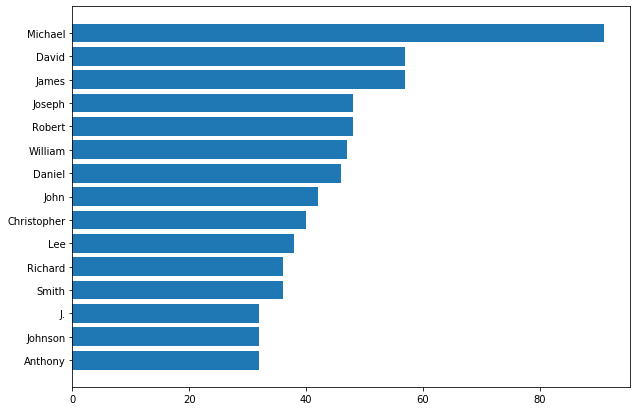

In [24]:
fig,ax=plt.subplots(figsize=(10,7))
ax.barh(x,y);

In [25]:
x,y = zip(*most)

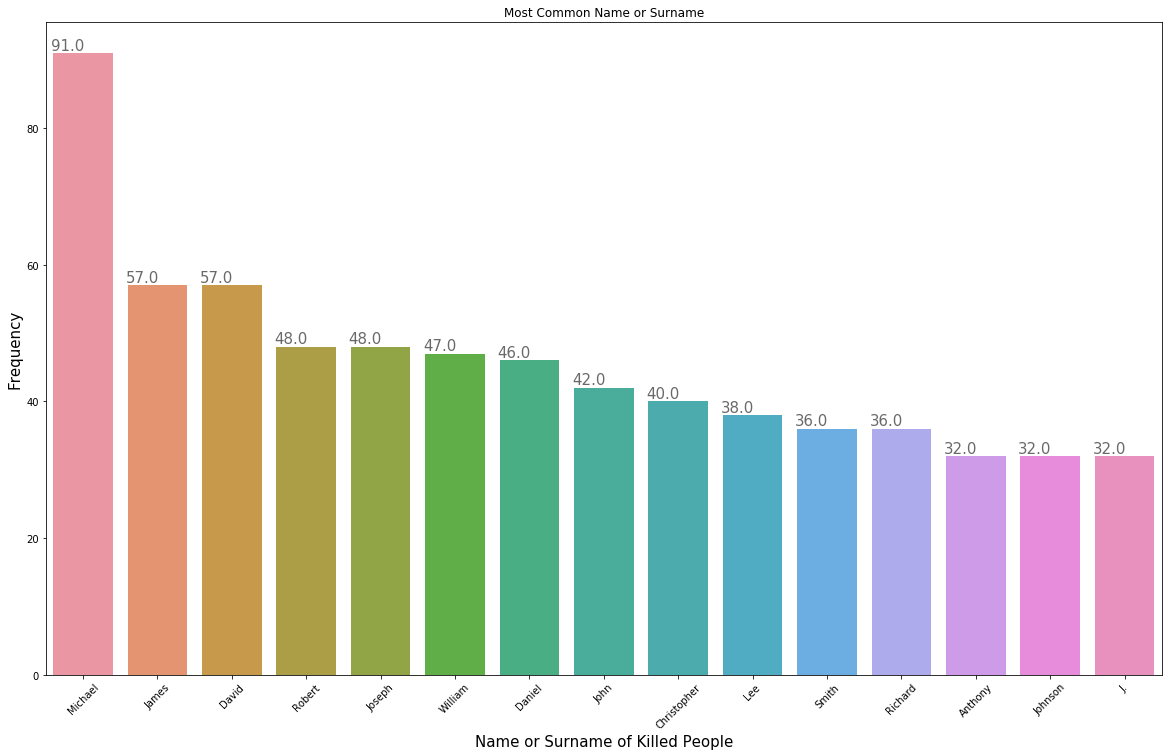

In [26]:
x= pd.Series(x)
y = pd.Series(y)
fig, ax = plt.subplots(figsize=(20, 12))
ax.set_xticklabels(x, rotation=45)
sns.barplot(x,y)

ax.set_title("Most Common Name or Surname")
ax.set_xlabel("Name or Surname of Killed People",fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_xticklabels(x, rotation=45);
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(i.get_height()), fontsize=15,
                color='dimgrey')

## 3. Killed People According to Races (Pie Chart)

In [27]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [28]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [29]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [30]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [31]:
kill.dropna(how ="all",inplace= True)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart**

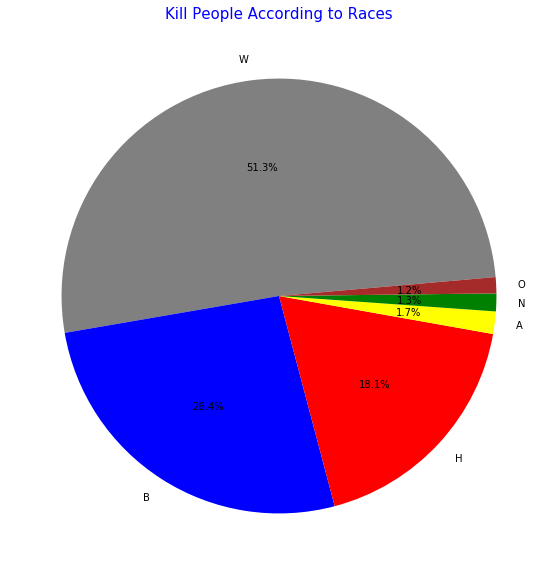

In [35]:

fig1, ax1 = plt.subplots(figsize=(16,10))

ax1.pie(kill.race.value_counts(True),labels=['W', 'B', 'H', 'A', 'N', 'O'],autopct='%1.1f%%',colors=["grey","blue","red","yellow","green","brown"],pctdistance=0.6,
         startangle=5)
ax1.set_title("Kill People According to Races", color="b", fontsize=15)



plt.show();

## 4a.Box plot of age in both genders separeted by manner of death.

In [33]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [34]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

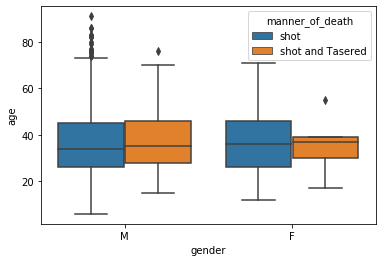

In [39]:
sns.boxplot(x='gender',y ="age" ,data = kill,hue="manner_of_death");

## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

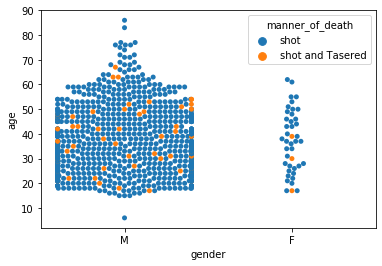

In [40]:
sns.swarmplot(x='gender',y ="age" ,data = kill.head(1000),hue="manner_of_death");

## 5. Kill properties (Count Plots)

**INSTRUCTION-1: Plot number of poeple by gender**

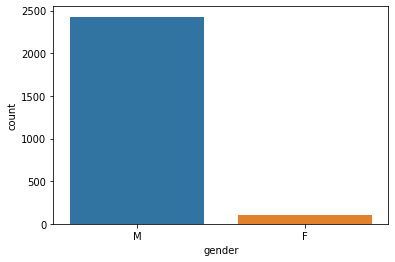

In [41]:
sns.countplot(x="gender", data=kill);

**INSTRUCTION-2: Plot 7 most common kill weapons**

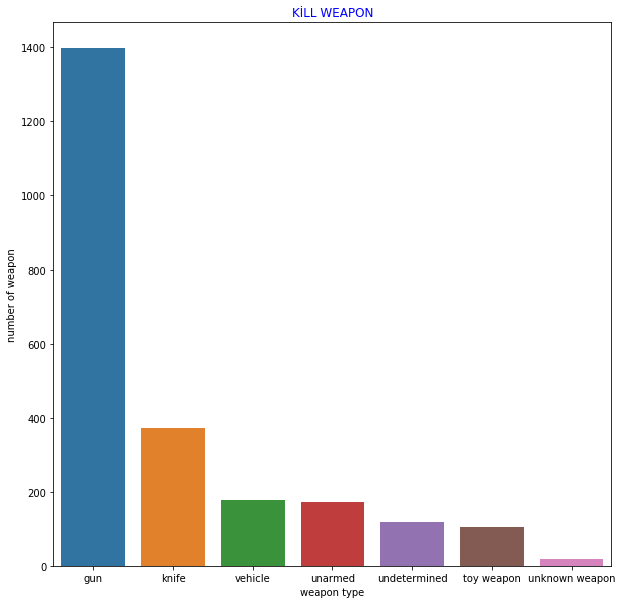

In [43]:
a = pd.DataFrame(k)
a.index.name="weapon type"
a.rename(columns={"armed":"number of weapon"},inplace=True)
k = kill.armed.value_counts().head(7)
fig,ax=plt.subplots(figsize=(10,10))
ax.set_title("KİLL WEAPON",color="b")


sns.barplot(x=a.index,y = a["number of weapon"]);


                      


**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [45]:
under25 = kill.age[kill.age<25].count()
under25


450

In [46]:
above25 = kill.age[kill.age>25].count()
above25

1905

In [47]:
d = {"number of people":[1905,450]}
k = pd.DataFrame(d) 
k=k.set_index([pd.Index(["above25","under25"])])
k                  

,number of people
above25,1905
under25,450


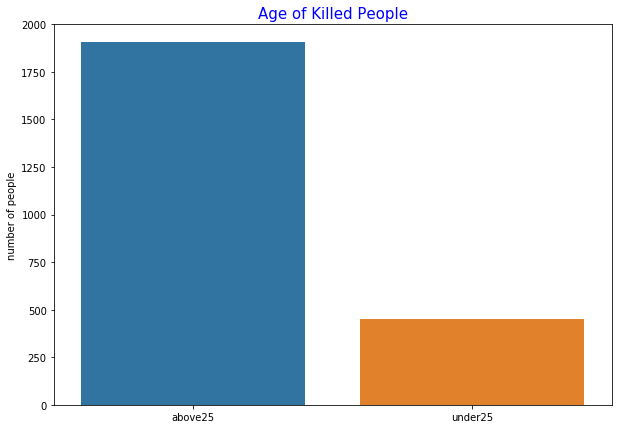

In [48]:
fig ,ax = plt.subplots(figsize = (10,7))
ax.set_title("Age of Killed People",color="b",fontsize=15)


sns.barplot(x=k.index,y =k["number of people"],data=k);
#sns.plot(above25,under25,data=k)

**INSTRUCTION-4: Plot number of killed poeple by race**

In [49]:
c =kill.race.value_counts()

In [50]:
x = pd.DataFrame(c)
x.index.name ="count"
#x.rename(columns={"race":"count"})
x

,race
count,
W,1201
B,618
H,423
A,39
N,31
O,28


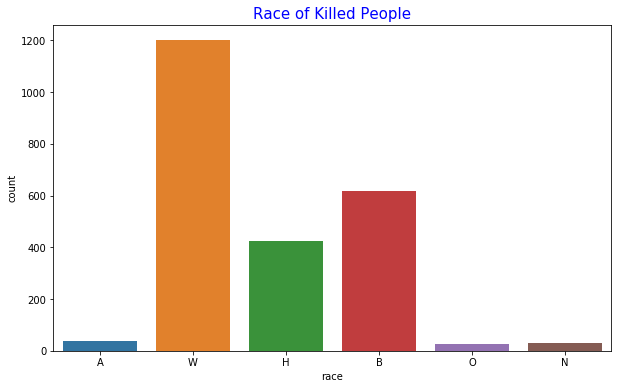

In [57]:
fig ,ax = plt.subplots(figsize = (10,6))
ax.set_title("Race of Killed People",color="b",fontsize=15)


sns.countplot(kill.race);

**INSTRUCTION-5: Plot 12 most dangerous cities**

In [52]:
y =kill.city.value_counts().head(12)

In [53]:
t = pd.DataFrame(y)
t

,city
Los Angeles,39
Phoenix,31
Houston,27
Chicago,25
Las Vegas,21
San Antonio,20
Columbus,19
Austin,18
Miami,18
St. Louis,15


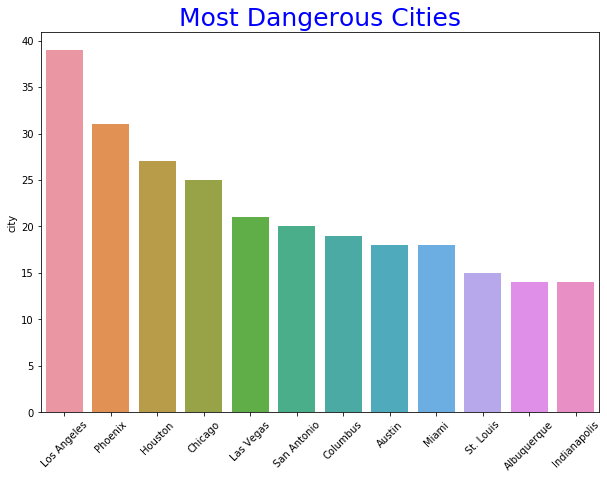

In [56]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Most Dangerous Cities",color="b",fontsize=25)
ax.set_xticklabels(t.index, rotation=45)
sns.barplot(x= t.index,y = t.city);





**INSTRUCTION-6: Plot 20 most dangerous states**

In [58]:
p =kill.state.value_counts().head(20)

In [59]:
v = pd.DataFrame(p)
v


,state
CA,424
TX,225
FL,154
AZ,118
OH,79
OK,78
CO,74
GA,70
NC,69
MO,64


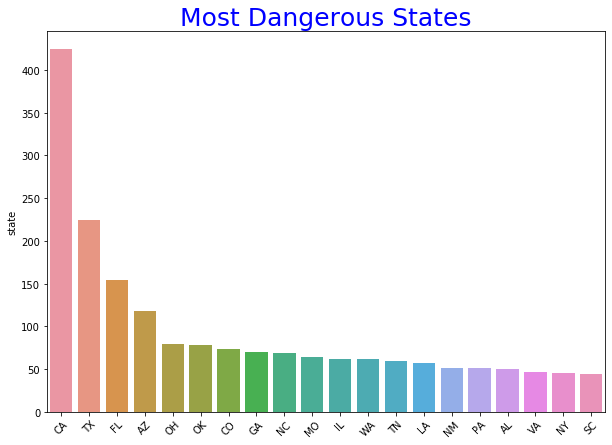

In [61]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Most Dangerous States",color="b",fontsize="25")

ax.set_xticklabels(x.index, rotation=45)
sns.barplot(x= v.index,y = v.state);

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

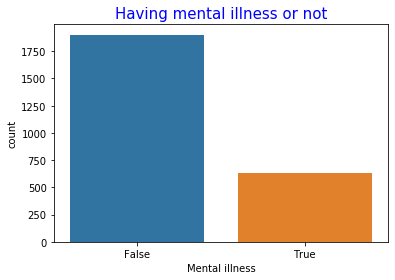

In [62]:
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel("Mental illness")
plt.title("Having mental illness or not", color="b", fontsize=15);

**INSTRUCTION-8: Plot number of Threat Types**

In [63]:
g = kill.threat_level.value_counts()
g 

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

In [64]:
f = pd.DataFrame(g)
f.index.name ="threat types"
f.rename(columns=({"threat level":"count"}),inplace =True)
f

,threat_level
threat types,
attack,1611
other,766
undetermined,158


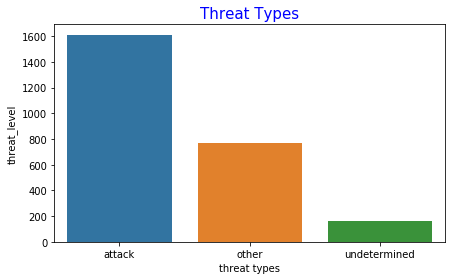

In [65]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_title("Threat Types",color="b",fontsize=15)

ax.set_xticklabels(x.index)
sns.barplot(x= f.index,y = f["threat_level"])

**INSTRUCTION-9: Plot number of Flee Types**

In [66]:
a=kill.flee.value_counts()
a

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

In [67]:
b = pd.DataFrame(a)
b.index.name ="Flee Types"
b.rename(columns={"flee":"count"},inplace = True)

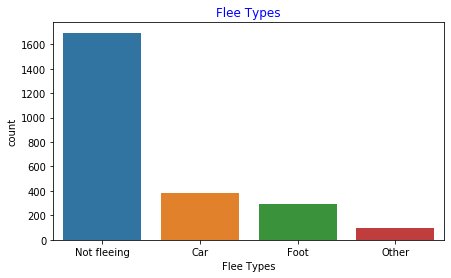

In [68]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_title("Flee Types",color="b")

ax.set_xticklabels(x.index)
sns.barplot(x= b.index,y = b["count"]);